<a href="https://colab.research.google.com/github/rcpsilva/BCC342_2021_1/blob/main/BCC325_JobShopScheduling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install MIP

In [ ]:
!pip install mip

# Jobshop scheduling

j0: m2(2) -> m0(1) -> m1(2) \\
j1: m1(1) -> m2(2) -> m0(2) \\
j2: m2(1) -> m1(2) -> m0(1)

In [ ]:
from itertools import product
from mip import Model, BINARY, MINIMIZE, INTEGER

In [ ]:
n = 3 # Number of jobs
m = 3 # Number of machines 

times = [[1,2,1],
         [2,1,2],
         [2,2,1]] # rows -> Machines, cols -> jobs

machines = [[2,0,1],
            [1,2,0],
            [2,1,0]] # rows -> jobs, cols-> operações

M = sum(times[i][j] for i in range(m) for j in range(n))

In [ ]:
model = Model('JSS',sense=MINIMIZE)

In [ ]:
c = model.add_var(name='C', lb=0)
x = [[model.add_var(name='x{}{}'.format(i,j), lb=0) for j in range(n)] for i in range(m)]
y = [[[model.add_var(name='y{}{}{}'.format(i,j,k),var_type=BINARY) for k in range(n)] for j in range(n)] for i in range(m)]

In [ ]:
model.objective = c

In [ ]:
for (o,j) in product(range(1,m),range(n)):
  model += x[machines[j][o]][j] >= x[machines[j][o-1]][j] + times[machines[j][o-1]][j]

In [ ]:
for (j,k) in product(range(n),range(n)):
  if k != j:
    for i in range(m):
      model += x[i][j] >= x[i][k] + times[i][k] - M*y[i][j][k]
      model += x[i][k] >= x[i][j] + times[i][j] - M*(1 - y[i][j][k])

In [ ]:
for j in range(n):
  model += c >= x[machines[j][m - 1]][j] + times[machines[j][m - 1]][j]

In [ ]:
model.optimize()

<OptimizationStatus.OPTIMAL: 0>

In [ ]:
print('Makespan: ', c.x)
for (j,i) in product(range(n),range(m)):
  print('Job {} starts on machine {} at time {}:'.format(j,i,x[i][j].x))

Makespan:  7.0
Job 0 starts on machine 0 at time 3.0:
Job 0 starts on machine 1 at time 4.0:
Job 0 starts on machine 2 at time 1.0:
Job 1 starts on machine 0 at time 5.0:
Job 1 starts on machine 1 at time 0.0:
Job 1 starts on machine 2 at time 3.0:
Job 2 starts on machine 0 at time 4.0:
Job 2 starts on machine 1 at time 1.0:
Job 2 starts on machine 2 at time 0.0:


# Regression

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as sopt

In [ ]:
X = np.random.rand(100,1)
Px = 4 + 3*X + np.random.randn(100,1)*0.5

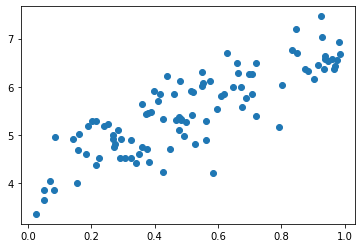

In [ ]:
plt.plot(X,Px,'o')

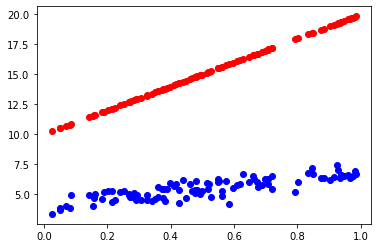

In [ ]:
w = [10,10] #-> y = 4 + 3x

fx = w[0] + w[1]*X   

plt.plot(X,Px,'bo')
plt.plot(X,fx,'ro')


In [ ]:
np.sum((fx-Px)**2)

9682.093304799953

In [ ]:
def fobj(w):
  fx = w[0] + w[1]*X
  return np.sum((fx-Px)**2)

In [ ]:
res = sopt.minimize(fobj,x0=[10,10], method='Powell')

In [ ]:
res

   direc: array([[ 0.        ,  1.        ],
       [ 2.9507894 , -4.53685306]])
     fun: 22.045959800242706
 message: 'Optimization terminated successfully.'
    nfev: 100
     nit: 3
  status: 0
 success: True
       x: array([4.09938376, 2.72407609])

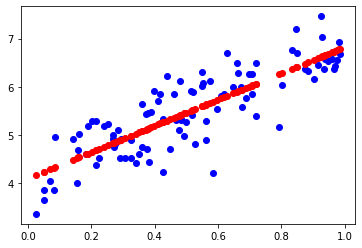

In [ ]:
fx =res.x[0] + res.x[1]*X   

plt.plot(X,Px,'bo')
plt.plot(X,fx,'ro')